In [1]:
from coffea import util, hist
import matplotlib.pyplot as plt
import mplhep
plt.style.use(mplhep.style.CMS)

In [4]:
infile_MC = util.load("DataHistograms_2017QCD.coffea")
infile_Sig1 = util.load("DataHistograms_2017Res1ToRes2GluTo3Glu.coffea")
infile_Sig2 = util.load("DataHistograms_2017Res1ToRes2QTo3Q.coffea")
infile_MC.add(infile_Sig1)
infile_MC.add(infile_Sig2)
display(infile_MC)

{'total_events': defaultdict_accumulator(int,
                         {'QCD_Pt_600to800': 12799311,
                          'QCD_Pt_800to1000': 1905945,
                          'QCD_Pt_3200toInf': 757837,
                          'QCD_Pt_1400to1800': 776000,
                          'QCD_Pt_2400to3200': 1485987,
                          'QCD_Pt_1800to2400': 856734,
                          'QCD_Pt_1000to1400': 1517307,
                          'QCD_Pt_470to600': 27791204,
                          'QCD_Pt_300to470': 109308273,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 49992,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 50000,
                          'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 49997,
                          'Res1ToRes2GluTo3Glu_M1-7000_R-0p5': 49999,
                          'Res1ToRes2

In [3]:
def plot_single(variable_list):# ==== Plotting ====
    fig, ax = plt.subplots(len(variable_list), 1, figsize=(10,len(variable_list)*8))
    ax_counter = 0
    for variable in variable_list:
        histo = infile_MC[variable].copy()
        histo.scale(weight_xsec, axis='dataset')
        ih = histo.integrate("selection",["Pre-selection"])
        ih = ih.group("dataset", hist.Cat("sel_dataset", "dataset"), mapping)
        plot = hist.plot1d(ih, ax=ax[ax_counter], density=True)
        plot.set_ylim(0.000001,5)
        plot.set_yscale('log')
        if "min_pt" in variable:
            plot.set_xlim(0,2500)
        if any(v in variable for v in ["min_pt","mjjj"]):
            plot.set_ylim(0.0000001,0.01)
        ax_counter+=1

[['mjjj', 'max_dR', 'max_dEta'],
 ['min_dR', 'min_dEta', 'min_pt'],
 ['max_eta', 'max_dR_j_jj', 'max_dEta_j_jj'],
 ['max_dPhi_j_jj', 'min_dR_j_jj', 'min_dEta_j_jj'],
 ['min_dPhi_j_jj', 'max_dPtoverM_j_jj', 'min_dPtoverM_j_jj']]

{'QCD_Pt_300to470': 2.5949536317347177,
 'QCD_Pt_470to600': 0.8250348923349993,
 'QCD_Pt_600to800': 0.5077964743570963,
 'QCD_Pt_800to1000': 0.5726337328726695,
 'QCD_Pt_1000to1400': 0.20446033663589502,
 'QCD_Pt_1400to1800': 0.034701097938144326,
 'QCD_Pt_1800to2400': 0.004238150814605233,
 'QCD_Pt_2400to3200': 0.0001463344430334855,
 'QCD_Pt_3200toInf': 7.436455332743056e-06,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p7': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p9': 0.8307329172667627,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p5': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p3': 0.8306,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p2': 0.8306498389903394,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p5': 0.8306166123322466,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p9': 0.865244385182716,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p7': 0.8836734259633594,
 'Res1ToRes2GluTo3Glu_M1-8000_R-0p1': 0.8655870276579337,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p3': 0.8306332253290132,
 'Res1ToRes2GluTo3Glu_M1-7000_R-0p2': 0.8306332253290132,
 'Res1ToRes2GluTo3

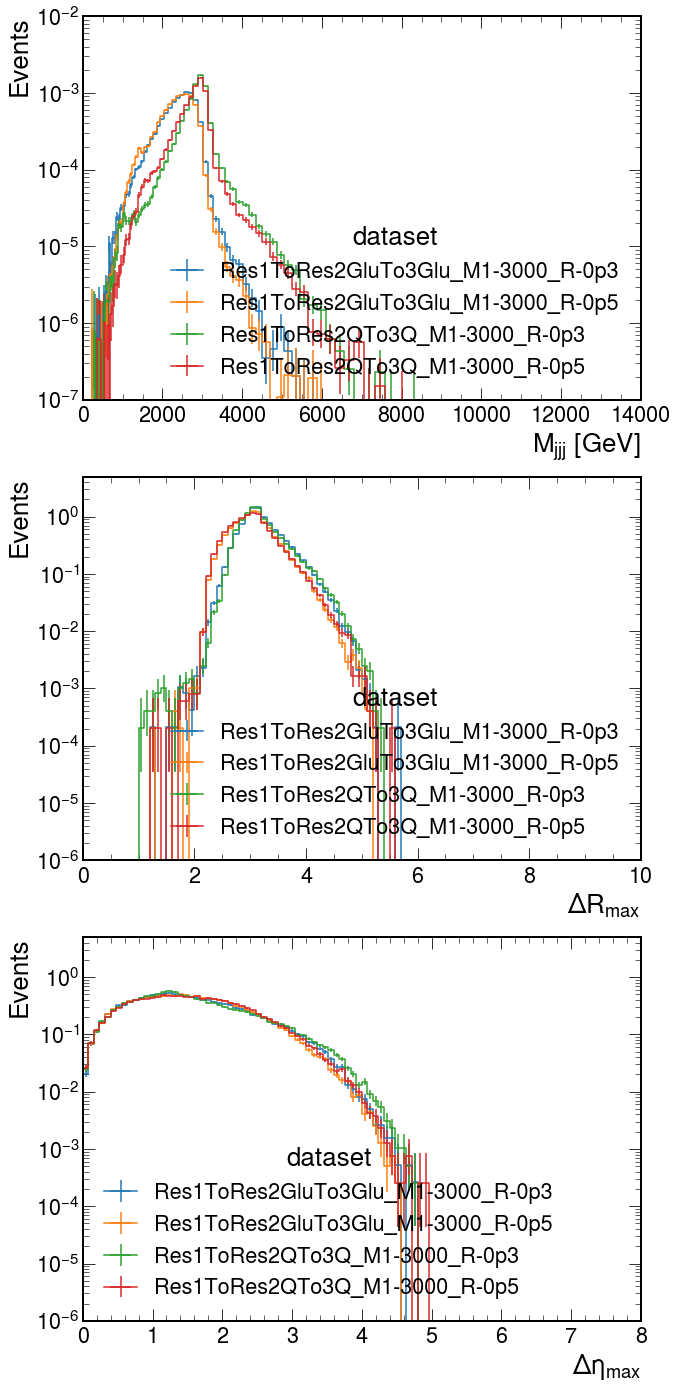

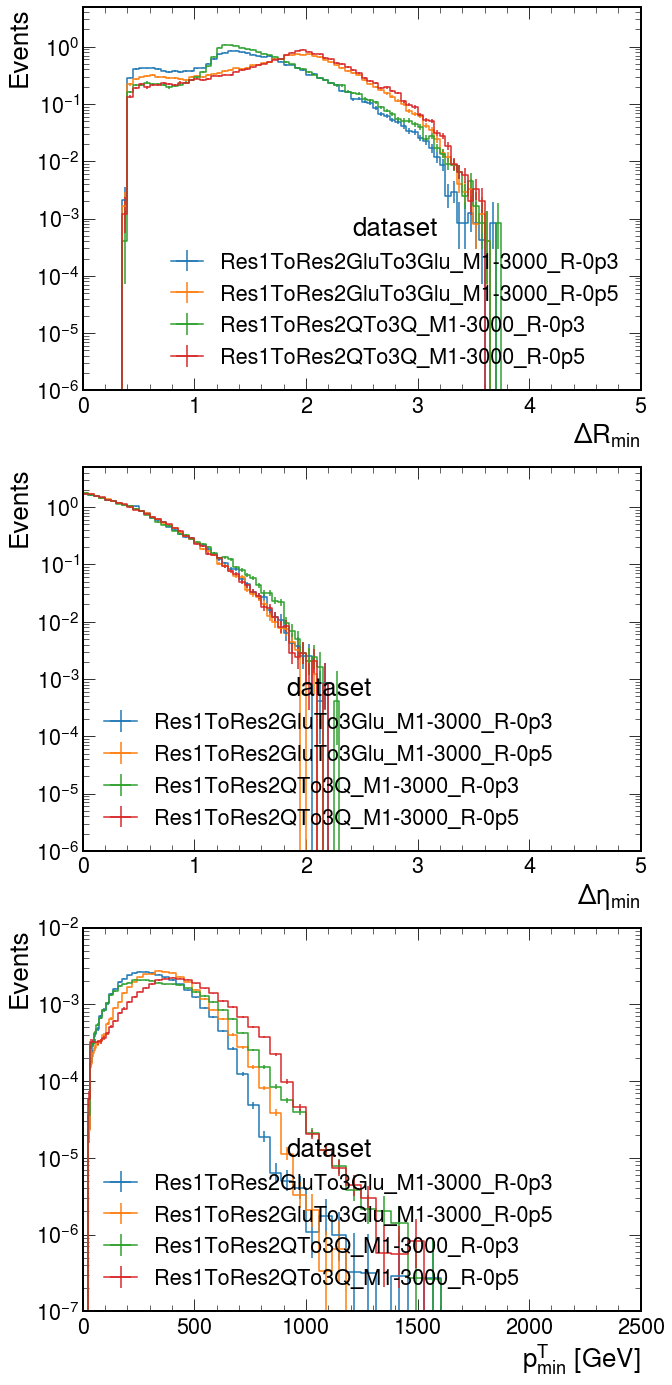

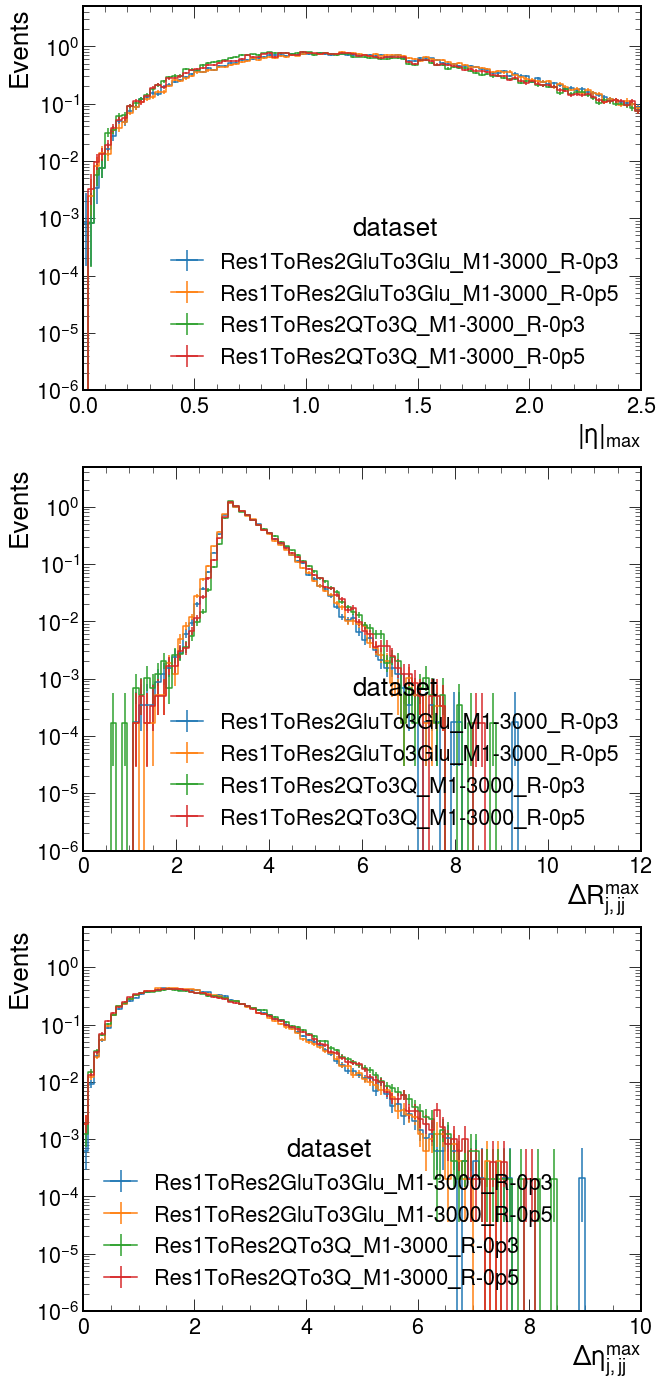

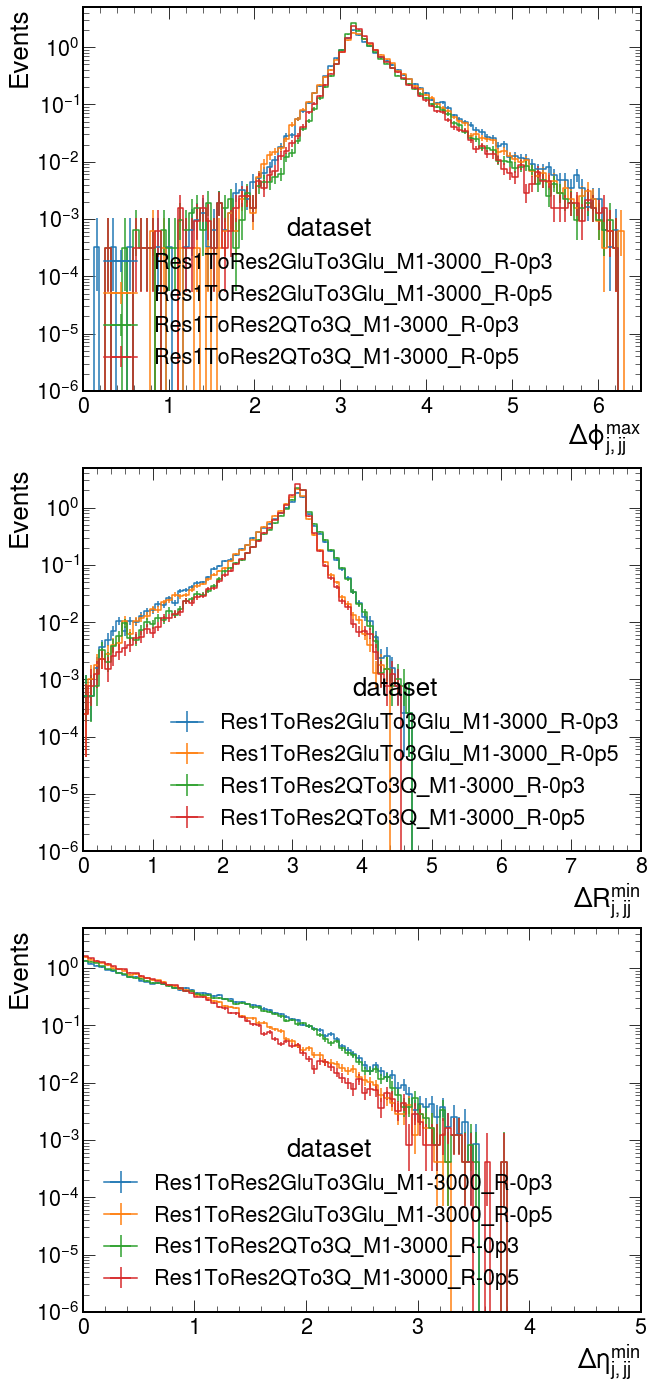

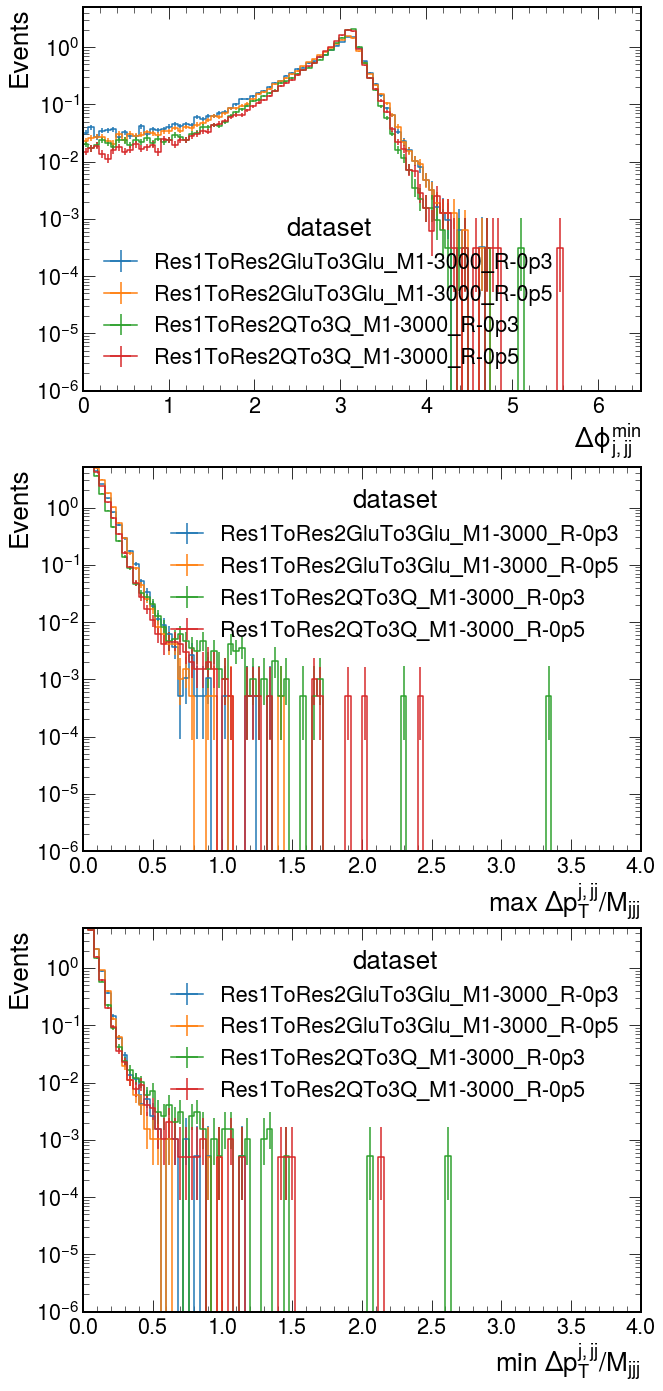

In [7]:
#  ==== List the variables that we want to plot ======
variable_list = []
for variable, accumulator in infile_MC.items():
    if "_i" in variable: # this kind of histos needs to be plotted differently
        continue
    variable_list.append(variable)
variable_list.pop(0)
variable_chunk = [variable_list[i * 3:(i + 1) * 3] for i in range((len(variable_list) + 3 - 1) // 3 )]  

display(variable_chunk)

# ==== Implement weight of MCs ====
lumi = 41.53*1000
weight_xsec = {
    'QCD_Pt_300to470': lumi*6830/infile_MC["total_events"]["QCD_Pt_300to470"],
    'QCD_Pt_470to600': lumi*552.1/infile_MC["total_events"]["QCD_Pt_470to600"],
    'QCD_Pt_600to800': lumi*156.5/infile_MC["total_events"]["QCD_Pt_600to800"],
    'QCD_Pt_800to1000': lumi*26.28/infile_MC["total_events"]["QCD_Pt_800to1000"],
    'QCD_Pt_1000to1400': lumi*7.47/infile_MC["total_events"]["QCD_Pt_1000to1400"],
    'QCD_Pt_1400to1800': lumi*0.6484/infile_MC["total_events"]["QCD_Pt_1400to1800"],
    'QCD_Pt_1800to2400': lumi*0.08743/infile_MC["total_events"]["QCD_Pt_1800to2400"],
    'QCD_Pt_2400to3200': lumi*0.005236/infile_MC["total_events"]["QCD_Pt_2400to3200"],
    'QCD_Pt_3200toInf': lumi*0.0001357/infile_MC["total_events"]["QCD_Pt_3200toInf"],
}
weight_sigMC1 = {}
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        continue
    weight_sigMC1[name] = lumi/N_evt
weight_xsec.update(weight_sigMC1)
display(weight_xsec)

# ==== Group datasets that we want to plot ====
QCD_entries = []
for name, N_evt in infile_MC["total_events"].items():
    if "QCD" in name:
        QCD_entries.append(name)
# print(QCD_entries)

mapping = {}
# mapping["QCD"] = QCD_entries

Sig_entries = ["Res1ToRes2GluTo3Glu_M1-3000_R-0p3", "Res1ToRes2GluTo3Glu_M1-3000_R-0p5", "Res1ToRes2QTo3Q_M1-3000_R-0p3", "Res1ToRes2QTo3Q_M1-3000_R-0p5"]
for sig in Sig_entries:
    mapping[sig] = sig

for chunk in variable_chunk:
    plot_single(chunk)
    print("===========================")

<Hist (sel_dataset,eta_2) instance at 0x7f8b2f2c6450>
<Hist (sel_dataset,eta_1) instance at 0x7f8b2f2c6610>
<Hist (sel_dataset,eta_0) instance at 0x7f8b2f2c6550>
<Hist (sel_dataset,ptoverM_2) instance at 0x7f8b38f7d850>
<Hist (sel_dataset,ptoverM_1) instance at 0x7f8b38f7da10>
<Hist (sel_dataset,ptoverM_0) instance at 0x7f8b38f7d690>
<Hist (sel_dataset,dR_20) instance at 0x7f8b2f3c4c50>
<Hist (sel_dataset,dR_12) instance at 0x7f8b2f3c4d10>
<Hist (sel_dataset,dR_01) instance at 0x7f8b390bfe90>
<Hist (sel_dataset,dEta_20) instance at 0x7f8b2eddebd0>
<Hist (sel_dataset,dEta_12) instance at 0x7f8b386e51d0>
<Hist (sel_dataset,dEta_01) instance at 0x7f8b368d3510>
<Hist (sel_dataset,moverM_20) instance at 0x7f8b421ccb50>
<Hist (sel_dataset,moverM_12) instance at 0x7f8b421ccc10>
<Hist (sel_dataset,moverM_01) instance at 0x7f8b421ccc90>
<Hist (sel_dataset,pt_2) instance at 0x7f8b39319e10>
<Hist (sel_dataset,pt_1) instance at 0x7f8b39319e50>
<Hist (sel_dataset,pt_0) instance at 0x7f8b39319e10>
<

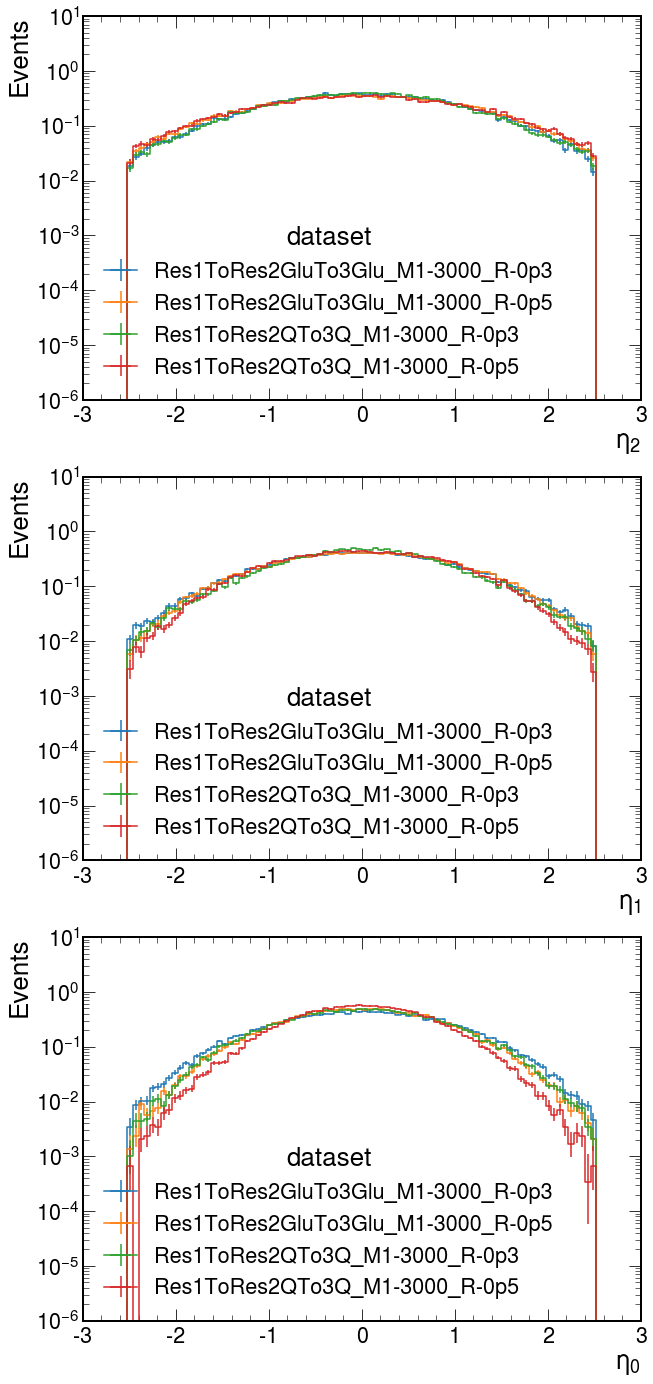

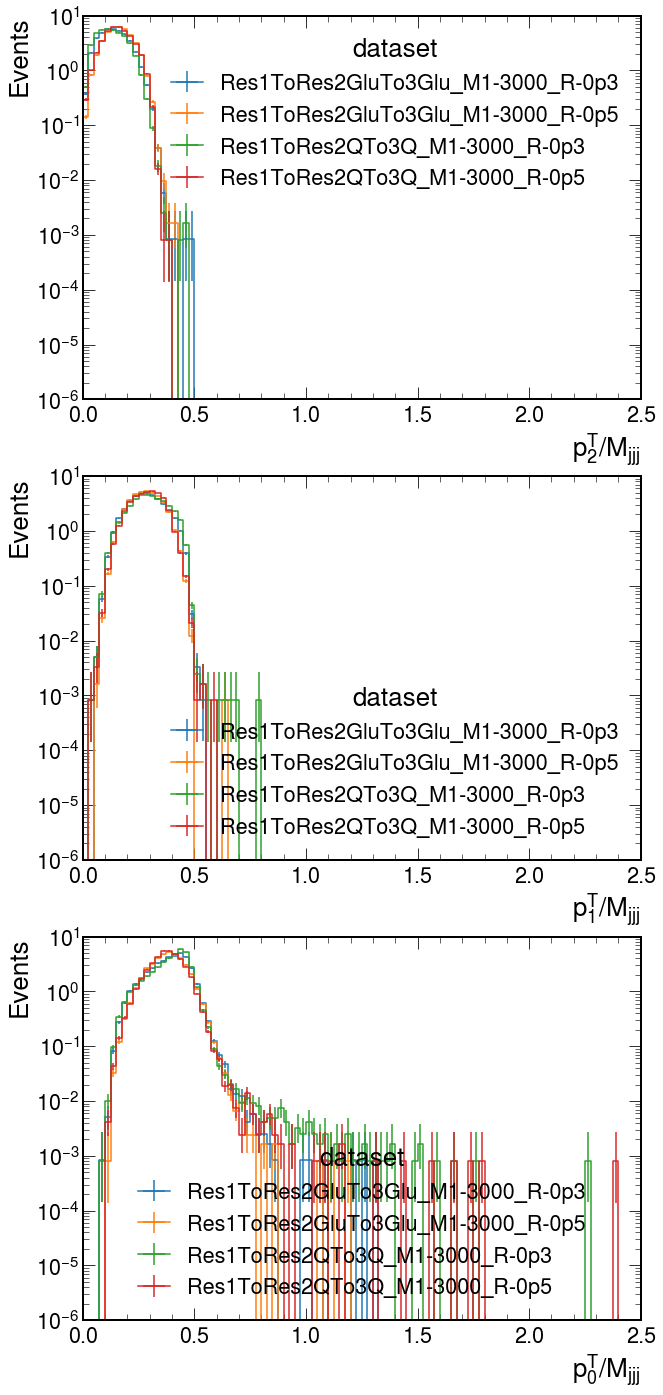

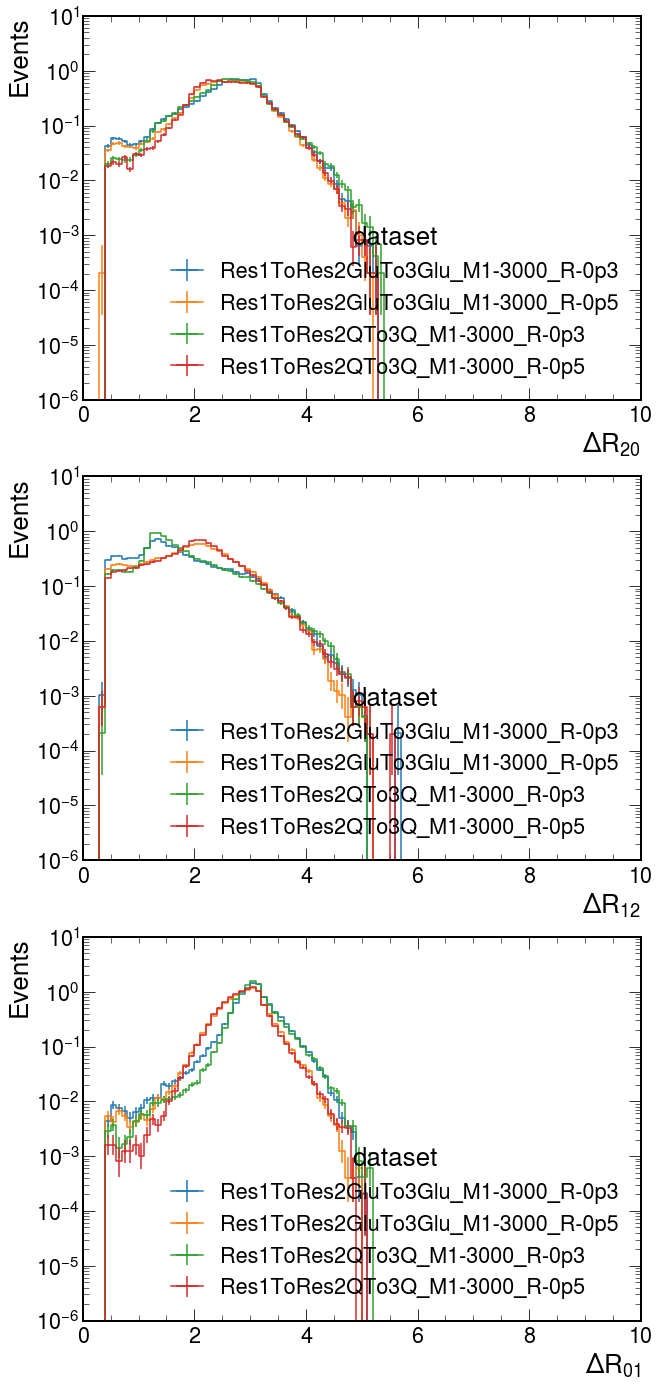

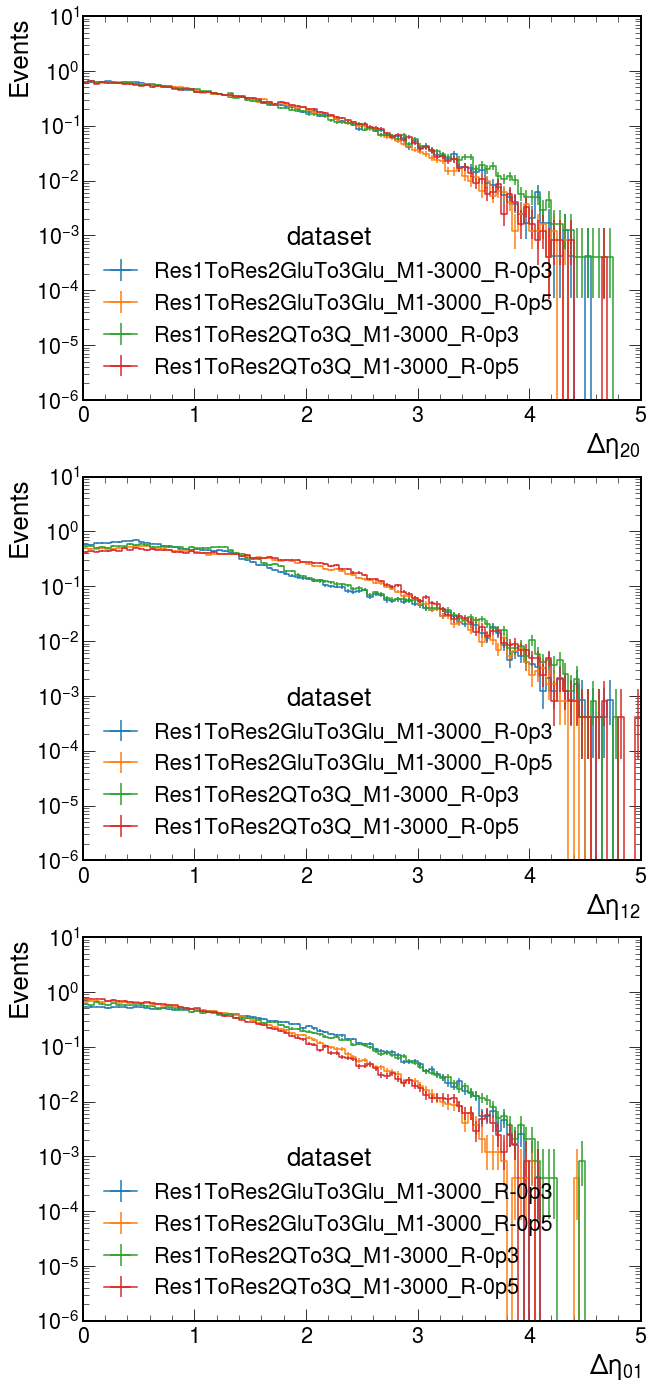

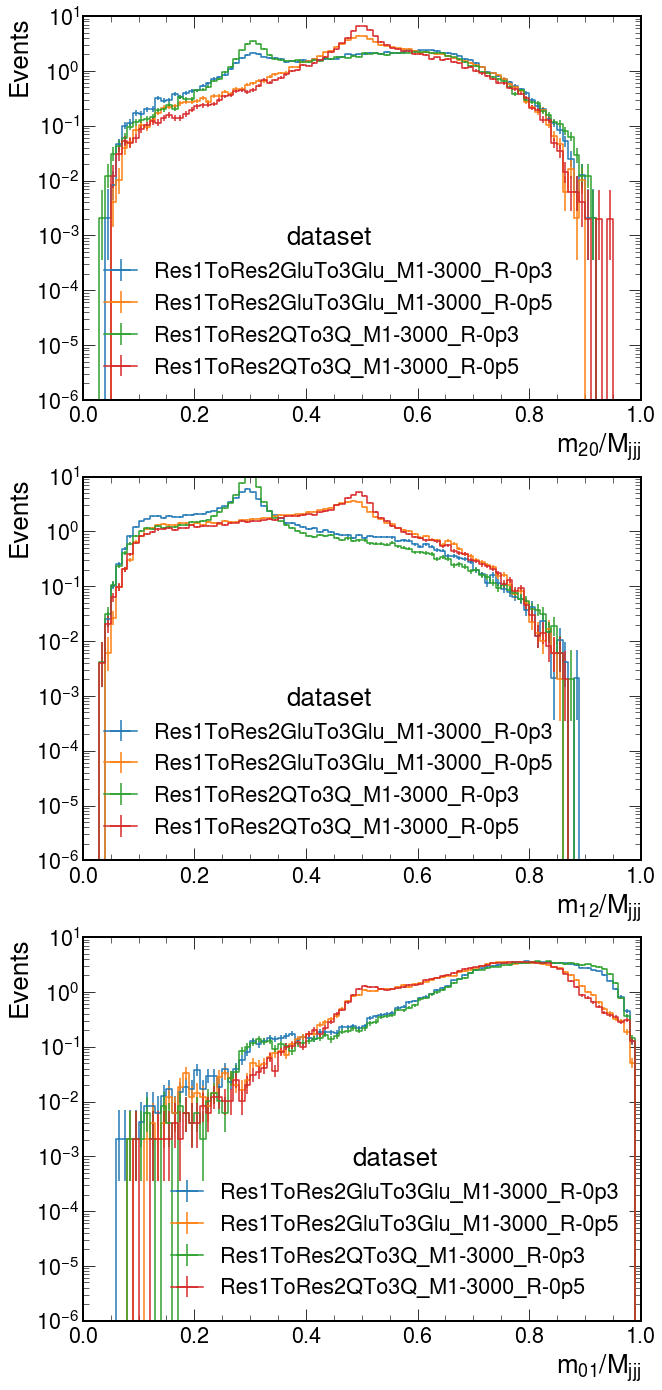

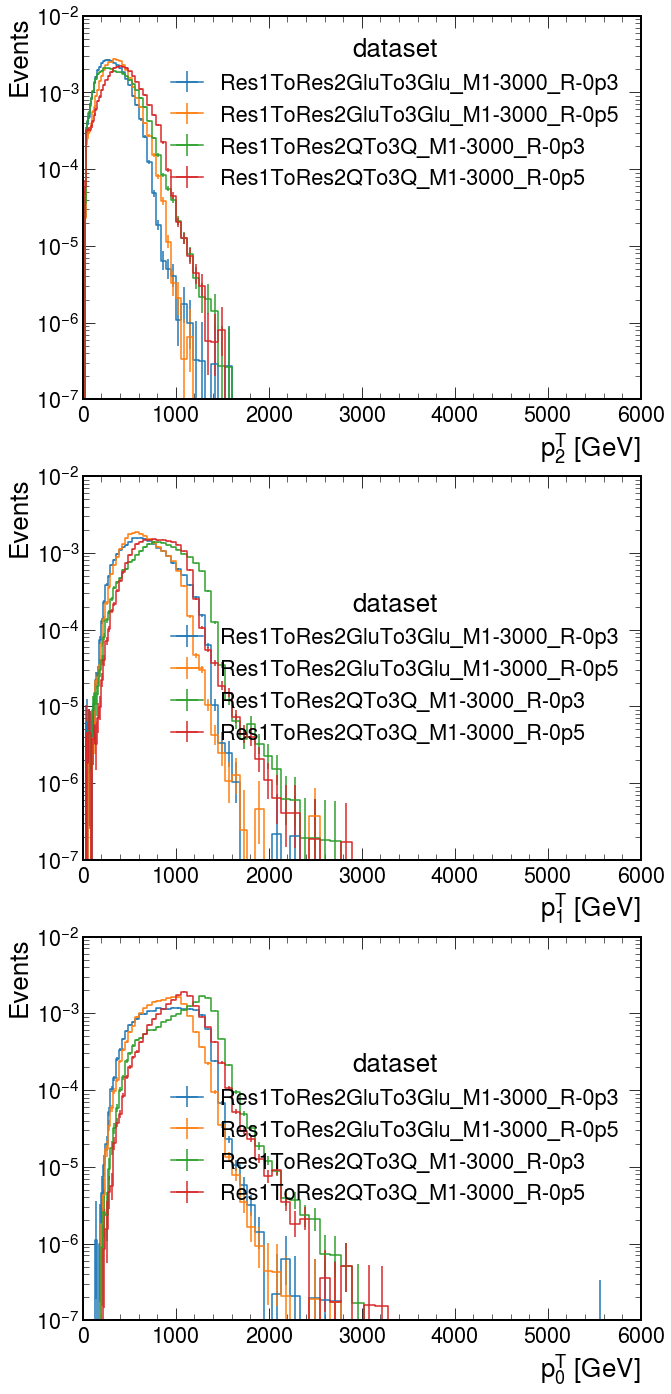

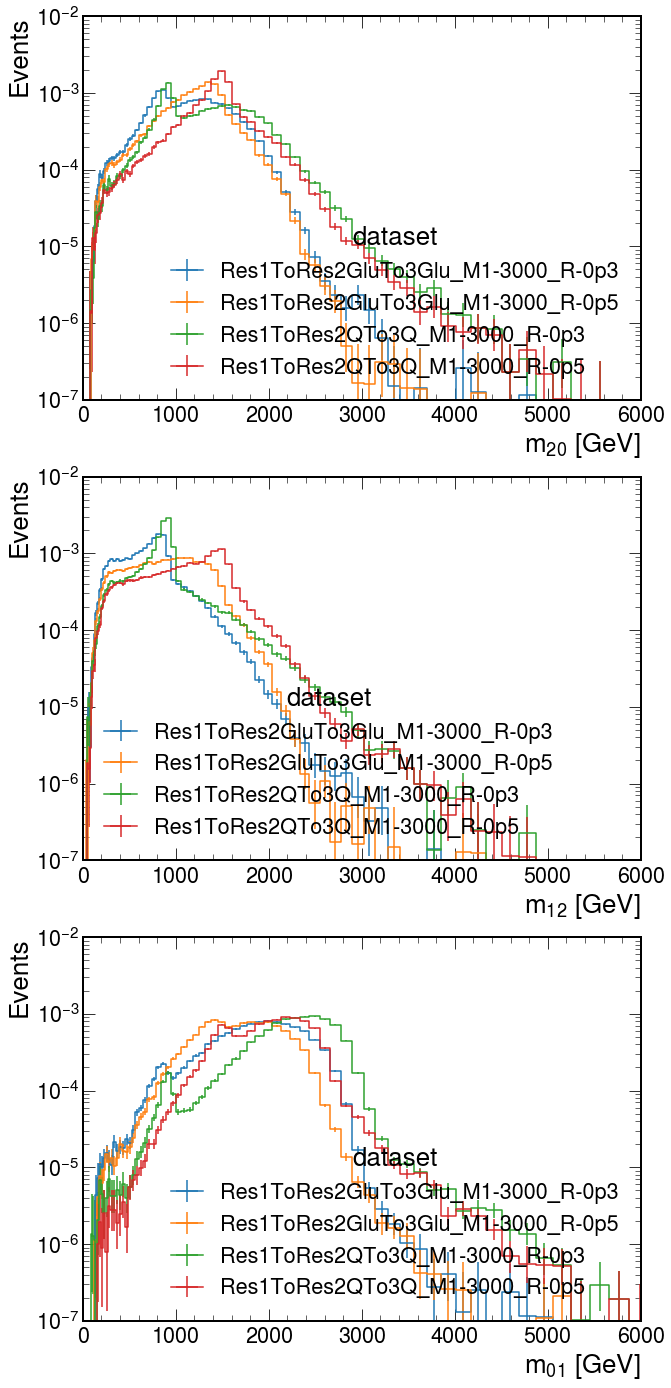

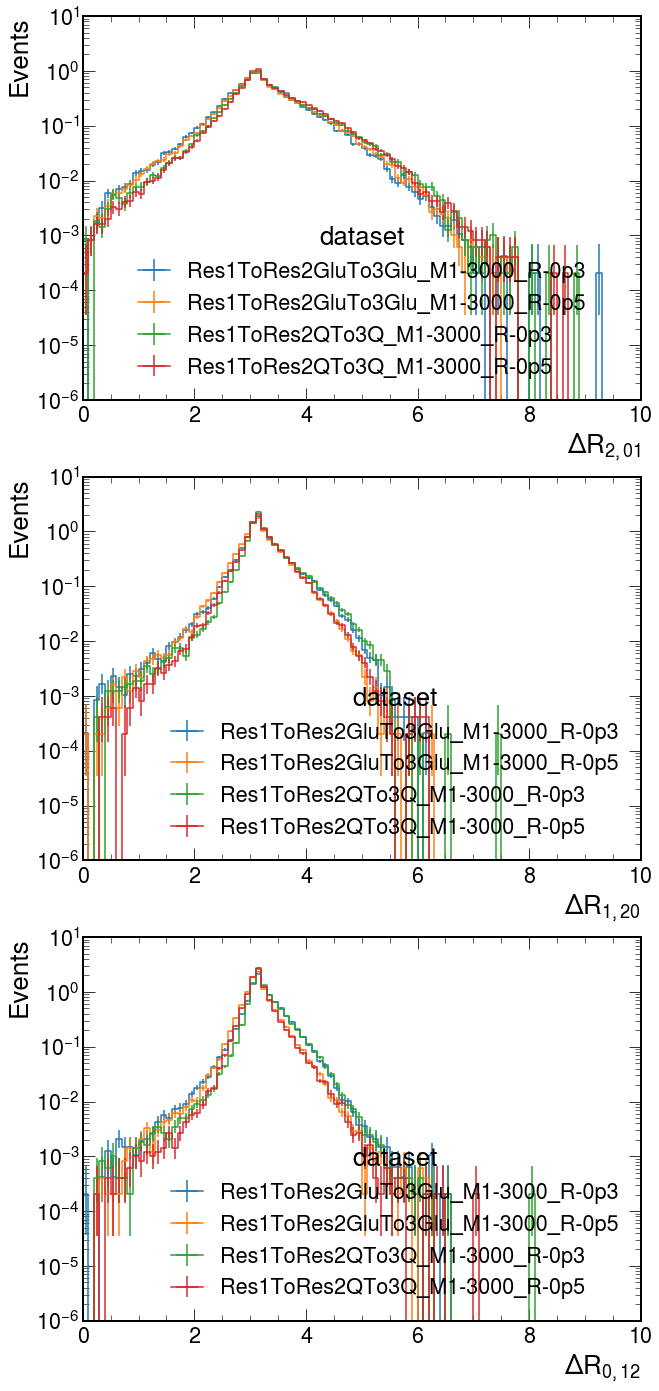

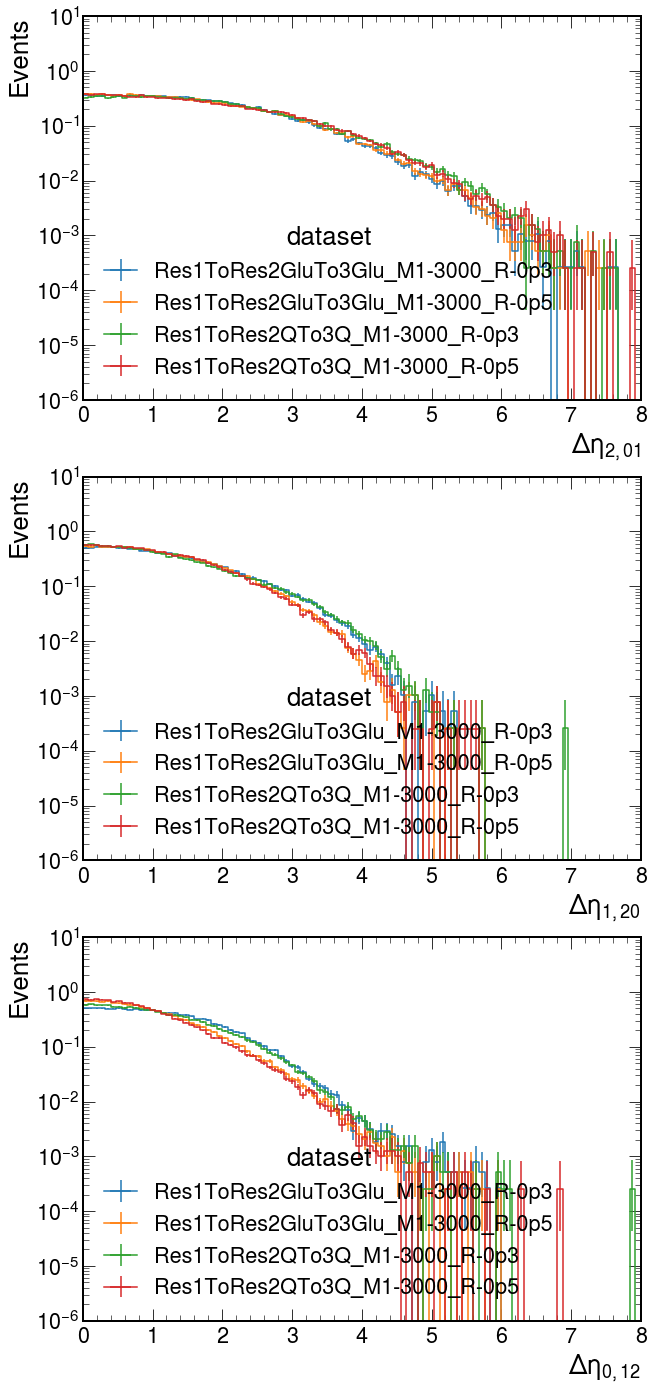

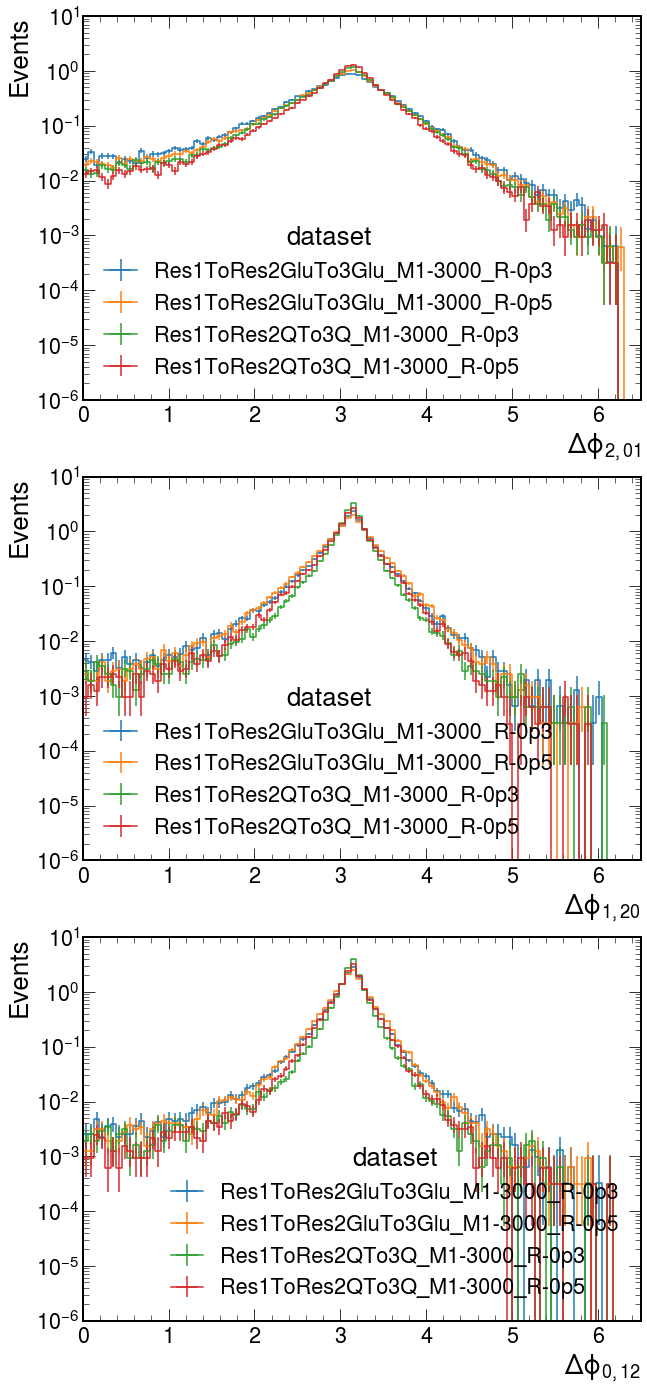

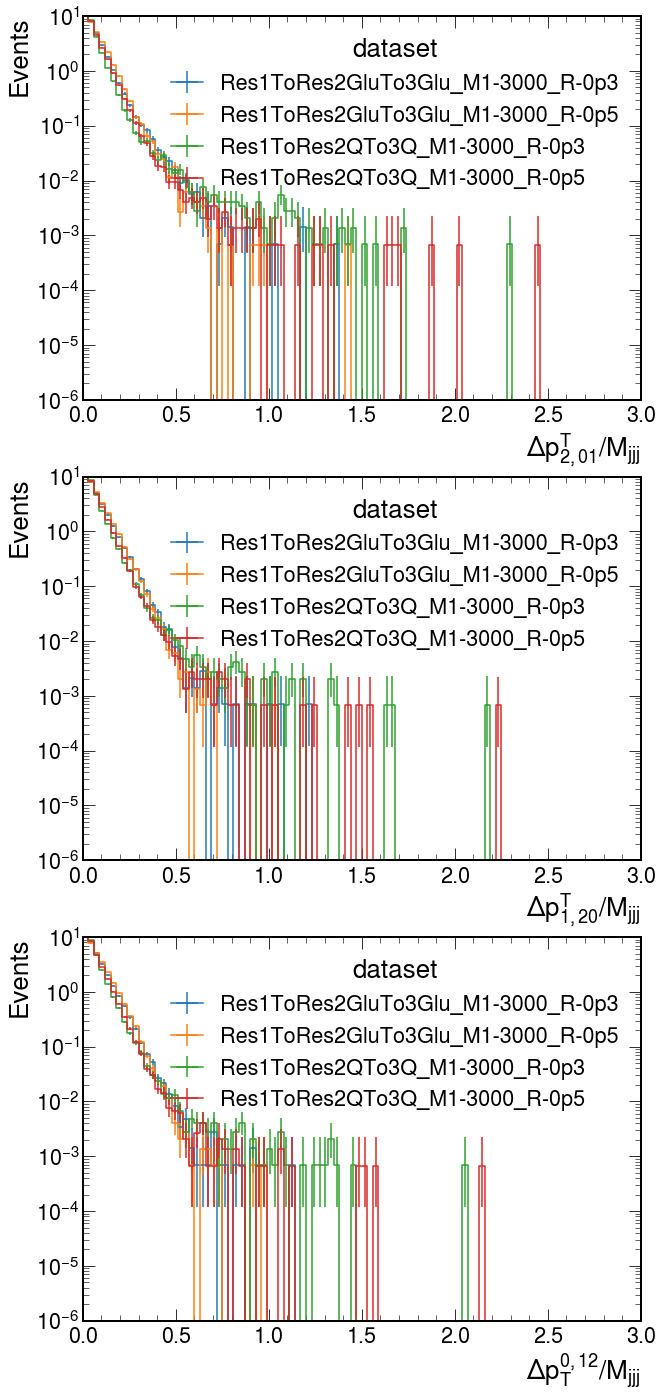

In [8]:
def plot_ij(variable2plot, variable_list): # this can also plot _i variables
    fig, ax = plt.subplots(3, 1, figsize=(10,24))
    ax_counter = 0
    for pair in itertools.combinations(variable_list,2):
        histo = infile_MC[variable2plot].copy()
        histo.scale(weight_xsec, axis='dataset')
        ih = histo.integrate("selection",["Pre-selection"])
        ih = ih.group("dataset", hist.Cat("sel_dataset", "dataset"), mapping).integrate(pair[0]).integrate(pair[1])
        print(ih)
        plot = hist.plot1d(ih, ax=ax[ax_counter], density=True)
        plot.set_ylim(0.000001,10)
        plot.set_yscale('log')
        if any(x in variable2plot for x in ["pt_i", "m_ij"]):
            plot.set_xlim(0,6000)
        if any(v in variable2plot for v in ["pt_i", "m_ij"]):
            plot.set_ylim(0.0000001,0.01)
        ax_counter+=1
    
import itertools

variable2plot = "eta_i"
variable_list = ["eta_0","eta_1","eta_2"]
plot_ij(variable2plot, variable_list)
variable2plot = "ptoverM_i"
variable_list = ["ptoverM_0","ptoverM_1","ptoverM_2"]
plot_ij(variable2plot, variable_list)
variable2plot = "dR_ij"
variable_list = ["dR_01","dR_12","dR_20"]
plot_ij(variable2plot, variable_list)
variable2plot = "dEta_ij"
variable_list = ["dEta_01","dEta_12","dEta_20"]
plot_ij(variable2plot, variable_list)
variable2plot = "moverM_ij"
variable_list = ["moverM_01","moverM_12","moverM_20"]
plot_ij(variable2plot, variable_list)
## These two need to be plotted at the end since they want different x range, which just can not be done by autoscale...
variable2plot = "pt_i"
variable_list = ["pt_0","pt_1","pt_2"]
plot_ij(variable2plot, variable_list)
variable2plot = "m_ij"
variable_list = ["m_01","m_12","m_20"]
plot_ij(variable2plot, variable_list)

variable2plot = "dR_i_jk"
variable_list = ["dR_0_12","dR_1_20","dR_2_01"]
plot_ij(variable2plot, variable_list)
variable2plot = "dEta_i_jk"
variable_list = ["dEta_0_12","dEta_1_20","dEta_2_01"]
plot_ij(variable2plot, variable_list)
variable2plot = "dPhi_i_jk"
variable_list = ["dPhi_0_12","dPhi_1_20","dPhi_2_01"]
plot_ij(variable2plot, variable_list)
variable2plot = "dPtoverM_i_jk"
variable_list = ["dPtoverM_0_12","dPtoverM_1_20","dPtoverM_2_01"]
plot_ij(variable2plot, variable_list)

In [ ]:
def plot_scatter(variable2plot, variable_list, dataset):
    fig, ax = plt.subplots(3, 1, figsize=(10,24))
    ax_counter = 0
    for ivar in variable_list:
        pair = variable_list.copy()
        pair.remove(ivar)
        histo = infile_MC[variable2plot].copy()
        histo.scale(weight_xsec, axis='dataset')
        ih = histo.integrate(axis2integrate,selection2plot).integrate("dataset",["Res1ToRes2GluTo3Glu_M1-2000_R-0p1"]).integrate(pair[0])
        display(ih)
        plot = hist.plot2d(ih, xaxis=pair[1], ax=ax[ax_counter])
        if variable2plot is "m_ij":
            plot.set_xlim(0,2000)
            plot.set_ylim(0,2000)
        ax_counter+=1
    
variable2plot = "m_ij"
variable_list = ["m_01","m_12","m_20"]
plot_scatter(variable2plot, variable_list, "Res1ToRes2GluTo3Glu_M1-2000_R-0p1")